In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
#@title Importing Csv File

dataset = pd.read_csv('/content/drive/MyDrive/car_data.csv')

data = dataset.iloc[:,1:].to_numpy()
classLabel = dataset.iloc[:,0].to_numpy()

In [ ]:
print(classLabel)
print()
print(data)
print()
print("Class Labels Shape: ", classLabel.shape)
print("Data Shape: ", data.shape)

['Toyoty' 'Mitsubishi' 'Skoda' 'Fiat' 'Mini' 'VW' 'Skoda' 'Mercedes'
 'Ford' 'Audi' 'Hyundai' 'Suzuki' 'Ford' 'Honda' 'Hundai' 'Opel' 'BMW'
 'Mazda' 'Skoda' 'Ford' 'Ford' 'Opel' 'Mercedes' 'Skoda' 'Volvo'
 'Mercedes' 'Audi' 'Audi' 'Volvo' 'BMW' 'Mercedes' 'Volvo' 'Ford' 'BMW'
 'Opel' 'Mercedes']

[['A ' 1.0 790 99]
 ['B ' 1.2 1160 95]
 ['A' 1.0 929 95]
 ['C ' 0.9 865 90]
 ['A' 1.5 1140 105]
 ['B ' 1.0 929 105]
 ['A' 1.4 1109 90]
 ['C ' 1.5 1365 92]
 ['C ' 1.5 1112 98]
 ['A' 1.6 1150 99]
 ['B ' 1.1 980 99]
 ['A' 1.3 990 101]
 ['B ' 1.0 1112 99]
 ['C ' 1.6 1252 94]
 ['A' 1.6 1326 97]
 ['A' 1.6 1330 97]
 ['B ' 1.6 1365 99]
 ['B ' 2.2 1280 104]
 ['C ' 1.6 1119 104]
 ['A' 2.0 1328 105]
 ['B ' 1.6 1584 94]
 ['A' 2.0 1428 99]
 ['C ' 2.1 1365 99]
 ['C ' 1.6 1415 99]
 ['A' 2.0 1415 99]
 ['B ' 1.5 1465 102]
 ['A' 2.0 1490 104]
 ['A' 2.0 1725 114]
 ['B ' 1.6 1523 109]
 ['C ' 2.0 1705 114]
 ['A' 2.1 1605 115]
 ['B ' 2.0 1746 117]
 ['B ' 1.6 1235 104]
 ['C ' 1.6 1390 108]
 ['C ' 1.6 1405 109]
 ['A'

#**Part A**

In [ ]:
#@title Normalizing Volume and Weight Features

scaler = StandardScaler()
scaler.fit(data[:, 1:3])
data[:, 1:3] = scaler.transform(data[:, 1:3])

In [ ]:
print(data)

[['A ' -1.5933664417543036 -2.1038925261412755 99]
 ['B ' -1.0719010608165318 -0.5540723487161131 95]
 ['A' -1.5933664417543036 -1.5216627838112822 95]
 ['C ' -1.8540991322231897 -1.7897397874740129 90]
 ['A' -0.2897029894098735 -0.6378464123607165 105]
 ['B ' -1.5933664417543036 -1.5216627838112822 105]
 ['A' -0.5504356798787597 -0.7676962110098516 90]
 ['C ' -0.2897029894098735 0.3046118036410715 92]
 ['C ' -0.2897029894098735 -0.7551301014631612 98]
 ['A' -0.028970298940987235 -0.5959593805384148 99]
 ['B ' -1.3326337512854174 -1.3080389215175434 99]
 ['A' -0.8111683703476454 -1.2661518896952417 101]
 ['B ' -1.5933664417543036 -0.7551301014631612 99]
 ['C ' -0.028970298940987235 -0.16871165595093757 94]
 ['A' -0.028970298940987235 0.14125237953409492 97]
 ['A' -0.028970298940987235 0.1580071922630156 97]
 ['B ' -0.028970298940987235 0.3046118036410715 99]
 ['B ' 1.5354258438723292 -0.05142796684849284 104]
 ['C ' -0.028970298940987235 -0.7258091791875501 104]
 ['A' 1.013960462934556

In [ ]:
#@title Training Model & Predicting using Linear Regression

#First 30 data points
x_train = data[:30, 1:3] # Volume and Weight
y_train = data[:30, 3] # CO2 Emissions

lr = LinearRegression()
lr.fit(x_train, y_train)

x_test = data[30:, 1:3]
y_test = data[30:, 3]

y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print("Actual values: ", y_test)
print("Predicted values: ", np.round(y_pred))
print('Mean squared error: {:.2f}'.format(mse))

Actual values:  [115 117 104 108 109 120]
Predicted values:  [104. 105. 100. 101. 101. 104.]
Mean squared error: 103.94


In [ ]:
#@title Training Model & Predicting using batch & stochastic gradient descent

x_train = data[:30,1:3]
y_train = data[:30,3]
x_test = data[30:,1:3]
y_test = data[30:,3]

x_train_bias = np.concatenate((np.ones((x_train.shape[0],1)), x_train), axis=1)
x_test_bias = np.concatenate((np.ones((x_test.shape[0],1)), x_test), axis=1)

weight = np.zeros(x_train_bias.shape[1]) # weight vector

learning_rate = 0.01
num_epochs = 1000
epoch_list_bgd = []
loss_list_bgd = []

# batch gradient descent
for epoch in range(num_epochs):
    gradient = (2/x_train_bias.shape[0]) * np.dot(x_train_bias.T, np.dot(x_train_bias, weight) - y_train)
    weight = weight - learning_rate * gradient
    # calculate loss and append to loss list
    loss = np.mean(np.square(np.dot(x_train_bias, weight) - y_train))
    loss_list_bgd.append(loss)
    epoch_list_bgd.append(epoch)

y_pred_batch = np.dot(x_test_bias, weight)

# stochastic gradient descent
weight = np.zeros(x_train_bias.shape[1])
num_epochs = 1000
epoch_list_sgd = []
loss_list_sgd = []

for epoch in range(num_epochs):
    for i in range(x_train_bias.shape[0]):
        idx = np.random.randint(x_train_bias.shape[0])
        xi = x_train_bias[idx,:]
        yi = y_train[idx]
        grad = (2/x_train_bias.shape[0]) * np.dot(xi.T, np.dot(xi, weight) - yi)
        weight = weight - learning_rate * grad
    loss = np.mean(np.square(np.dot(x_train_bias, weight) - y_train))
    loss_list_sgd.append(loss)
    epoch_list_sgd.append(epoch)

y_pred_stochastic = np.dot(x_test_bias, weight)

# MSE
mse_batch = mean_squared_error(y_test, y_pred_batch)
mse_stochastic = mean_squared_error(y_test, y_pred_stochastic)

print("Actual values: ", y_test)
print("Predicted batch gradient descent values: ", np.round(y_pred_batch.astype(int)))
print("Predicted stochastic gradient descent values: ", np.round(y_pred_stochastic.astype(int)))

print('Mean squared error (batch): {:.2f}'.format(mse_batch))
print('Mean squared error (stochastic): {:.2f}'.format(mse_stochastic))

Actual values:  [115 117 104 108 109 120]
Predicted batch gradient descent values:  [104 104 100 101 101 104]
Predicted stochastic gradient descent values:  [104 104 100 101 101 104]
Mean squared error (batch): 104.01
Mean squared error (stochastic): 105.50


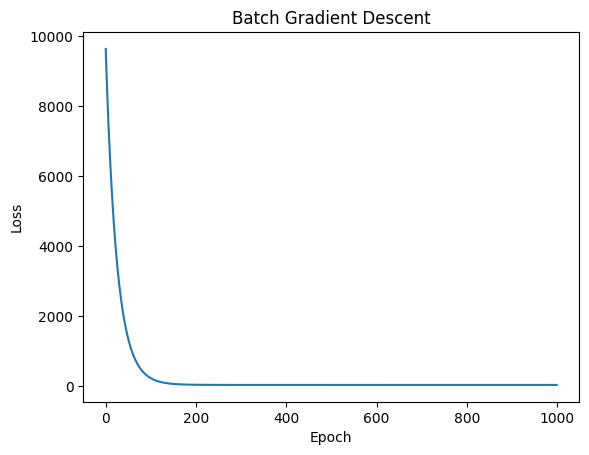

In [ ]:
#@title Plotting loss versus epoch graph for BGD

plt.plot(epoch_list_bgd, loss_list_bgd)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent')
plt.show()

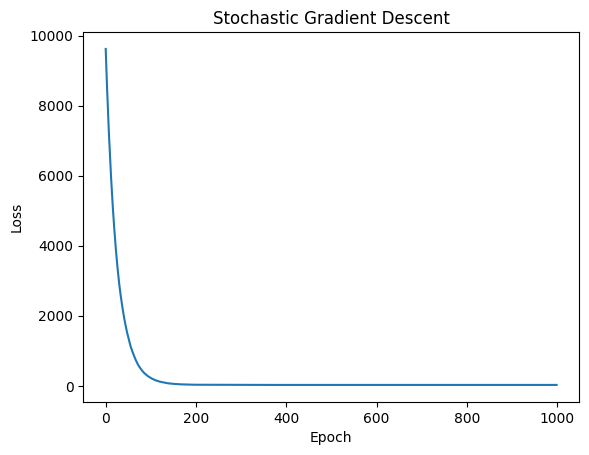

In [ ]:
#@title Plotting loss versus epoch graph for SGD

plt.plot(epoch_list_sgd, loss_list_sgd)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Stochastic Gradient Descent')
plt.show()

#**Part B**

In [ ]:
#@title Also including Type of Engine Variable

engine_type_dict = {"A": 0, "B": 1, "C": 2}
engine_type = data[:,0]
engine_type_int = np.array([engine_type_dict[val.strip()] for val in engine_type])
engine_type_dummy = np.zeros((len(engine_type_int), len(engine_type_dict)))

for i, val in enumerate(engine_type_int):
    engine_type_dummy[i, val] = 1

data = np.concatenate((engine_type_dummy, data[:,1:]), axis=1)

x_train = data[:30,:-1]
y_train = data[:30,-1]
x_test = data[30:,:-1]
y_test = data[30:,-1]

x_train_bias = np.concatenate((np.ones((x_train.shape[0],1)), x_train), axis=1)
x_test_bias = np.concatenate((np.ones((x_test.shape[0],1)), x_test), axis=1)

weight = np.zeros(x_train_bias.shape[1])

learning_rate = 0.01
num_epochs = 1000
epoch_list_bgd2 = []
loss_list_bgd2 = []

# batch gradient descent
for epoch in range(num_epochs):
    gradient = (2/x_train_bias.shape[0]) * np.dot(x_train_bias.T, np.dot(x_train_bias, weight) - y_train)
    weight = weight - learning_rate * gradient
    # calculate loss and append to loss list
    loss = np.mean(np.square(np.dot(x_train_bias, weight) - y_train))
    loss_list_bgd2.append(loss)
    epoch_list_bgd2.append(epoch)

y_pred_batch = np.dot(x_test_bias, weight)

# stochastic gradient descent
weight = np.zeros(x_train_bias.shape[1])
num_epochs = 1000
epoch_list_sgd2 = []
loss_list_sgd2 = []

for epoch in range(num_epochs):
    for i in range(x_train_bias.shape[0]):
        idx = np.random.randint(x_train_bias.shape[0])
        xi = x_train_bias[idx,:]
        yi = y_train[idx]
        grad = (2/x_train_bias.shape[0]) * np.dot(xi.T, np.dot(xi, weight) - yi)
        weight = weight - learning_rate * grad
    loss = np.mean(np.square(np.dot(x_train_bias, weight) - y_train))
    loss_list_sgd2.append(loss)
    epoch_list_sgd2.append(epoch)

y_pred_stochastic = np.dot(x_test_bias, weight)

# MSE
mse_batch = mean_squared_error(y_test, y_pred_batch)
mse_stochastic = mean_squared_error(y_test, y_pred_stochastic)

print("Actual values: ", y_test)
print("Predicted batch gradient descent values: ", np.round(y_pred_batch.astype(int)))
print("Predicted stochastic gradient descent values: ", np.round(y_pred_stochastic.astype(int)))

print('Mean squared error (batch): {:.2f}'.format(mse_batch))
print('Mean squared error (stochastic): {:.2f}'.format(mse_stochastic))

Actual values:  [115 117 104 108 109 120]
Predicted batch gradient descent values:  [104 106 101  99  99 105]
Predicted stochastic gradient descent values:  [104 106 101  99  99 105]
Mean squared error (batch): 102.17
Mean squared error (stochastic): 98.78


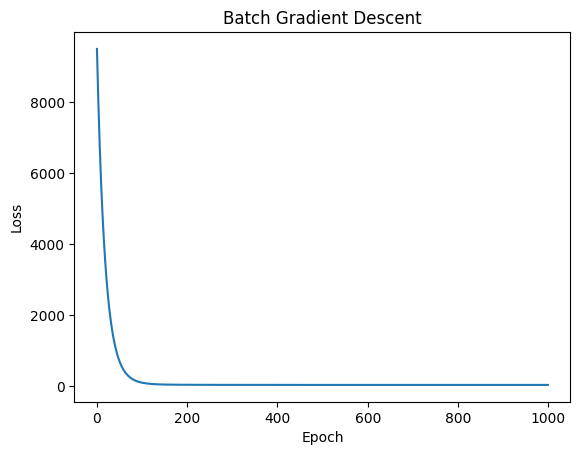

In [ ]:
#@title Plotting loss versus epoch graph for BGD

plt.plot(epoch_list_bgd2, loss_list_bgd2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent')
plt.show()

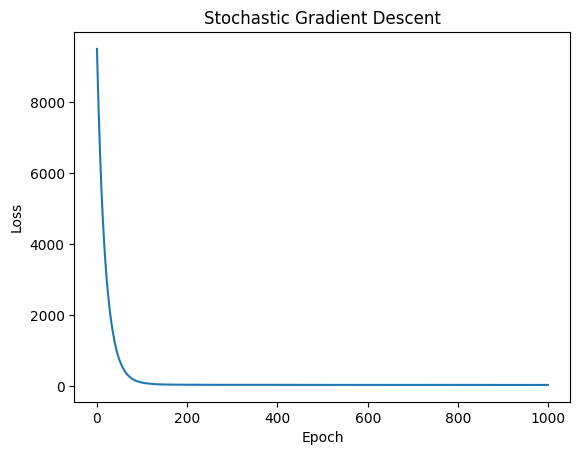

In [ ]:
#@title Plotting loss versus epoch graph for SGD

plt.plot(epoch_list_sgd2, loss_list_sgd2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Stochastic Gradient Descent')
plt.show()